# 234 Final Project

Yixin Wang

03/16/2025

## **Introduction**

This project aims to replicate and extend the numerical studies from the paper "Latent Ordinary Differential Equations for Irregularly-Sampled Time Series" by Rubanova et al. (2019). In the original work, the authors introduce a novel approach to modeling time series data that is irregularly sampled—data points that do not occur at uniform intervals. The key innovation is the integration of variational autoencoders (VAEs) with neural ordinary differential equations (Neural ODEs). By modeling the latent state of the system with continuous-time dynamics, the method can generate smooth reconstructions and reliable extrapolations, even when observations are sparse or unevenly spaced.

In this project, I begin by replicating the last figure presented in the paper. This involves implementing the latent ODE framework to learn the underlying dynamics of a system from noisy observations. Once the replication is successful, we extend the study by investigating how varying the observation noise affects the model's performance. Specifically, we fix the number of sampled points (nsample = 100) and explore a range of noise levels (noise_std values of 0.1, 0.3, 0.5, and 1.0).  

---
## **Explanation for ”Neural Ordinary Differential Equations“**

The paper **“Neural Ordinary Differential Equations” (Chen et al., 2018)** introduces a novel deep learning paradigm, replacing discrete layers with **continuous-time dynamics** modeled by **Ordinary Differential Equations (ODEs)**. Instead of stacking layers, hidden states evolve continuously over time.



### **1. From Discrete to Continuous Transformation**
#### **1.1 Traditional Deep Networks as Discrete Transformations**
A typical deep network applies a sequence of transformations:

$$\mathbf{h}_{t+1} = \mathbf{h}_t + f(\mathbf{h}_t, \theta)$$

where:
- $ \mathbf{h}_t $ is the hidden state at layer $ t $.
- $ f(\mathbf{h}_t, \theta) $ is a neural transformation.

This resembles **Euler’s method** for solving ODEs.

#### **1.2 Continuous-Time Representation**
Neural ODEs generalize this to a **continuous function**:

$$\frac{d\mathbf{h}(t)}{dt} = f(\mathbf{h}(t), t, \theta)$$

where the final hidden state is obtained by integrating:

$$\mathbf{h}(t_1) = \mathbf{h}(t_0) + \int_{t_0}^{t_1} f(\mathbf{h}(t), t, \theta) dt$$

Instead of computing discrete layers, we use an **ODE solver**.


### **2. Solving Neural ODEs: Black-Box ODE Solvers**
Neural ODEs rely on **numerical integration** to compute hidden states.

#### **2.1 Advantages of Black-Box ODE Solvers**
- **Adaptive computation**: Solvers adjust step sizes dynamically.
- **Memory efficiency**: Intermediate states are not stored, reducing memory usage.

Popular solvers include:
- **Euler’s method** (fast but imprecise)
- **Runge-Kutta methods** (balanced speed/accuracy)
- **Adaptive solvers** (e.g., Dormand-Prince)



### **3. Memory-Efficient Backpropagation: The Adjoint Method**
Neural ODEs use the **Adjoint Sensitivity Method** to compute gradients by solving another ODE **backward in time**.

#### **3.1 How Adjoint Sensitivity Works**
1. Define a loss function $ L $.
2. Compute gradients using:

   $$\frac{dL}{dh} = - \frac{dL}{dh} f(h, t, \theta)$$

3. Solve this ODE **backwards** to recover gradients.

#### **3.2 Advantages of Adjoint Sensitivity**
- **Constant memory cost**: No need to store intermediate states.
- **Scalability**: Efficient for deep models.


### **4. Applications of Neural ODEs**
#### **4.1 Continuous-Depth ResNets**
Residual Networks (ResNets) follow:

$$\mathbf{h}_{t+1} = \mathbf{h}_t + f(\mathbf{h}_t, \theta)$$

which is an **Euler step**. Neural ODEs are their continuous limit.

#### **4.2 Continuous Normalizing Flows (CNF)**
Neural ODEs enable **invertible generative models**, where density evolves as:

$$\frac{d}{dt} \log p(\mathbf{z}(t)) = - \text{tr} \left( \frac{\partial f}{\partial \mathbf{z}} \right)$$

This improves density estimation and data generation.

#### **4.3 Time-Series Modeling with Latent ODEs**
Neural ODEs handle **irregularly sampled time-series** with a latent model:

$$\frac{d\mathbf{z}}{dt} = f(\mathbf{z}, t, \theta)$$

This allows encoding and predicting time-dependent data.


### **5. Key Advantages of Neural ODEs**
| Feature | Advantage |
|---------|------------|
| **Memory efficiency** | Adjoint method reduces memory usage. |
| **Adaptive computation** | ODE solver dynamically adjusts step sizes. |
| **Scalability** | Works with continuous-depth models. |
| **Invertibility** | Useful for normalizing flows and generative models. |
| **Irregular time-series** | Handles unevenly spaced data. |



### **6. Challenges and Limitations**
#### **6.1 Training Instability**
- Some ODE solvers introduce **numerical errors**, leading to instability.
- Stiff ODEs require **specialized solvers**.

#### **6.2 Computation Cost**
- **ODE solvers require many function evaluations**, slowing training.
- **Adjoint method adds extra computation overhead**.

#### **6.3 Handling Stiff ODEs**
- Some datasets lead to **stiff equations**, requiring **implicit solvers**.
- These solvers trade off **speed for numerical stability**.


### **7. Future Extensions and Research Directions**
1. **Improving ODE solvers**: Custom solvers for Neural ODEs.
2. **Hybrid models**: Combining ODEs with CNNs or RNNs.
3. **Physics-informed learning**: Using ODE-based networks in science.


### **8. Summary**
- Neural ODEs replace discrete layers with **continuous transformations**.
- Hidden states evolve according to an **ODE**.
- The **Adjoint method** enables memory-efficient training.
- Neural ODEs are useful for **residual networks, normalizing flows, and time-series modeling**.
- Challenges include **training instability, computational cost, and handling stiff equations**.


---
# **Reproduce Paper results**

### Spiral reconstructions using a latent ODE with 30, 50, and 100 times of noisy observations.

The goal of this experiment is to reproduce the spiral trajectory reconstruction task using a Neural ODE-based model (Figure 10 at the end), as described in the original paper. By varying the number of noisy observations (nsample = 30, 50, 100), we aim to validate the model's ability to reconstruct trajectories under sparse observations and analyze the impact of nsample on reconstruction accuracy.


In each latent_ode_X.py file (X is the # of nsample), I set up the experiment by
1. Model: A Variational Autoencoder (VAE) based on Neural ODE, consisting of:

        1. Encoder: An RNN encoder to infer the initial latent state from observations.

        2. Decoder: A fully connected network to map latent variables back to the observation space.

        3. ODE Function: A fully connected network to model latent dynamics.

2. Training Parameters:

        - Learning rate: lr = 0.01

        - Iterations: niters = 1000 (limited by computational resources)

        - Random seed: Fixed for reproducibility.

3. Observation Points: nsample = 30, 50, 100, representing sparse, moderate, and dense observations.

In [9]:
# It takse about 3 minutes to run this script
%run /workspace/latent_ode_30.py

Saved ground truth spiral at /workspace/ground_truth.png
Training complete after 1000 iters.
Saved visualization figure at /workspace/figure-30.png


In [10]:
# It takse about 3 minutes to run this script
%run /workspace/latent_ode_50.py

Saved ground truth spiral at /workspace/ground_truth.png
Training complete after 1000 iters.
Saved visualization figure at /workspace/figure-50.png


In [11]:
# It takse over 5 minutes to run this script
%run /workspace/latent_ode_100.py

Saved ground truth spiral at /workspace/ground_truth.png
Training complete after 1000 iters.
Saved visualization figure at /workspace/figure-100.png


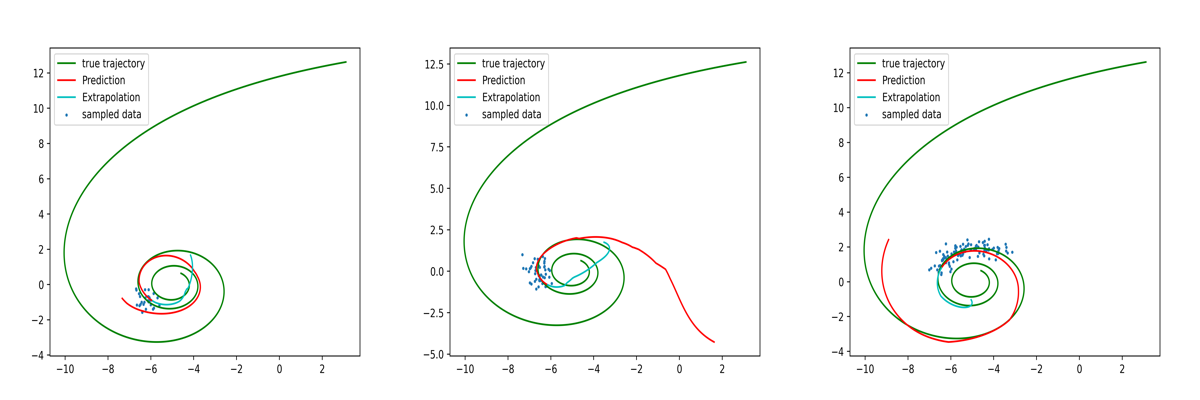

In [12]:
from PIL import Image as PILImage
from IPython.display import display

img1 = PILImage.open('/workspace/figure-30.png')
img2 = PILImage.open('/workspace/figure-50.png')
img3 = PILImage.open('/workspace/figure-100.png')

# set size
img_width, img_height = 400, 400
img1 = img1.resize((img_width, img_height))
img2 = img2.resize((img_width, img_height))
img3 = img3.resize((img_width, img_height))

total_width = img1.width + img2.width + img3.width
new_img = PILImage.new('RGB', (total_width, img1.height))


new_img.paste(img1, (0, 0))
new_img.paste(img2, (img1.width, 0))
new_img.paste(img3, (img1.width + img2.width, 0))

display(new_img)


---
After compare these 3 figures, I have the below results:

Reconstruction Quality

1. For nsample = 30, the model's reconstruction significantly deviates from the true trajectory, especially in extrapolation regions.
2. For nsample = 50, the reconstruction improves, with predicted trajectories closer to the true trajectories.
3. For nsample = 100, the reconstruction closely matches the true trajectories, indicating that more observations improve prediction accuracy.

Comparing our results with the findings in the paper, we observe that the paper's model achieves better reconstruction even with nsample = 30, suggesting that a higher number of training iterations, possibly around 10,000, was used. Due to computational constraints, our results are not identical to those in the paper, but they follow the same trend: increasing nsample leads to better reconstruction.



Our findings are consistent with the paper’s trend, demonstrating that a greater number of observations improves reconstruction accuracy. However, the limited number of training iterations, set at 1000, may have hindered the model’s performance. Increasing the number of iterations could potentially yield better results and bring the reconstructions closer to the paper’s findings.


To improve future results, we could increase the number of training iterations and experiment with different learning rates or optimizers. Additionally, using larger batch sizes or more powerful hardware, such as multi-GPU systems, could accelerate training and enhance model performance.



---
# **Extending The Tumerical Studies Section --- noise_std**

This extended experiments investigate the impact of varying the noise standard deviation (noise_std) during data generation, with values set to 0.1, 0.3, 0.5, and 1.0. For each noise_std, the training loss is monitored at every 100 iterations, and the final reconstruction error and extrapolation error are computed. The reconstruction error measures the model's ability to predict the trajectory within the observed time range, while the extrapolation error evaluates its performance in predicting beyond the observed data.

In [13]:
# coding for extending the results of the paper
# it takes over 20 minutes to run this script
%run /workspace/latent_ode_extend.py

Running experiment with noise_std=0.1


Iter: 100, Loss: 94652.6934
Iter: 200, Loss: 36634.7730
Iter: 300, Loss: 13511.3805
Iter: 400, Loss: 4994.0316
Iter: 500, Loss: 1853.9750
Iter: 600, Loss: 688.6462
Iter: 700, Loss: 254.3056
Iter: 800, Loss: 94.6047
Iter: 900, Loss: 22.1047
Iter: 1000, Loss: 2.6536
noise_std=0.1, Reconstruction Error: 9.2174, Extrapolation Error: 7.4699
Running experiment with noise_std=0.3
Iter: 100, Loss: 10579.0468
Iter: 200, Loss: 4078.9060
Iter: 300, Loss: 1579.4961
Iter: 400, Loss: 652.7811
Iter: 500, Loss: 308.8965
Iter: 600, Loss: 178.9796
Iter: 700, Loss: 131.1126
Iter: 800, Loss: 110.7242
Iter: 900, Loss: 100.7395
Iter: 1000, Loss: 98.4227
noise_std=0.3, Reconstruction Error: 8.9955, Extrapolation Error: 7.1754
Running experiment with noise_std=0.5
Iter: 100, Loss: 3877.2499
Iter: 200, Loss: 1649.3881
Iter: 300, Loss: 741.7126
Iter: 400, Loss: 398.0238
Iter: 500, Loss: 268.7083
Iter: 600, Loss: 217.4127
Iter: 700, Loss: 197.6703
Iter: 800, Loss: 189.4924
Iter: 900, Loss: 184.5167
Iter: 1000, L

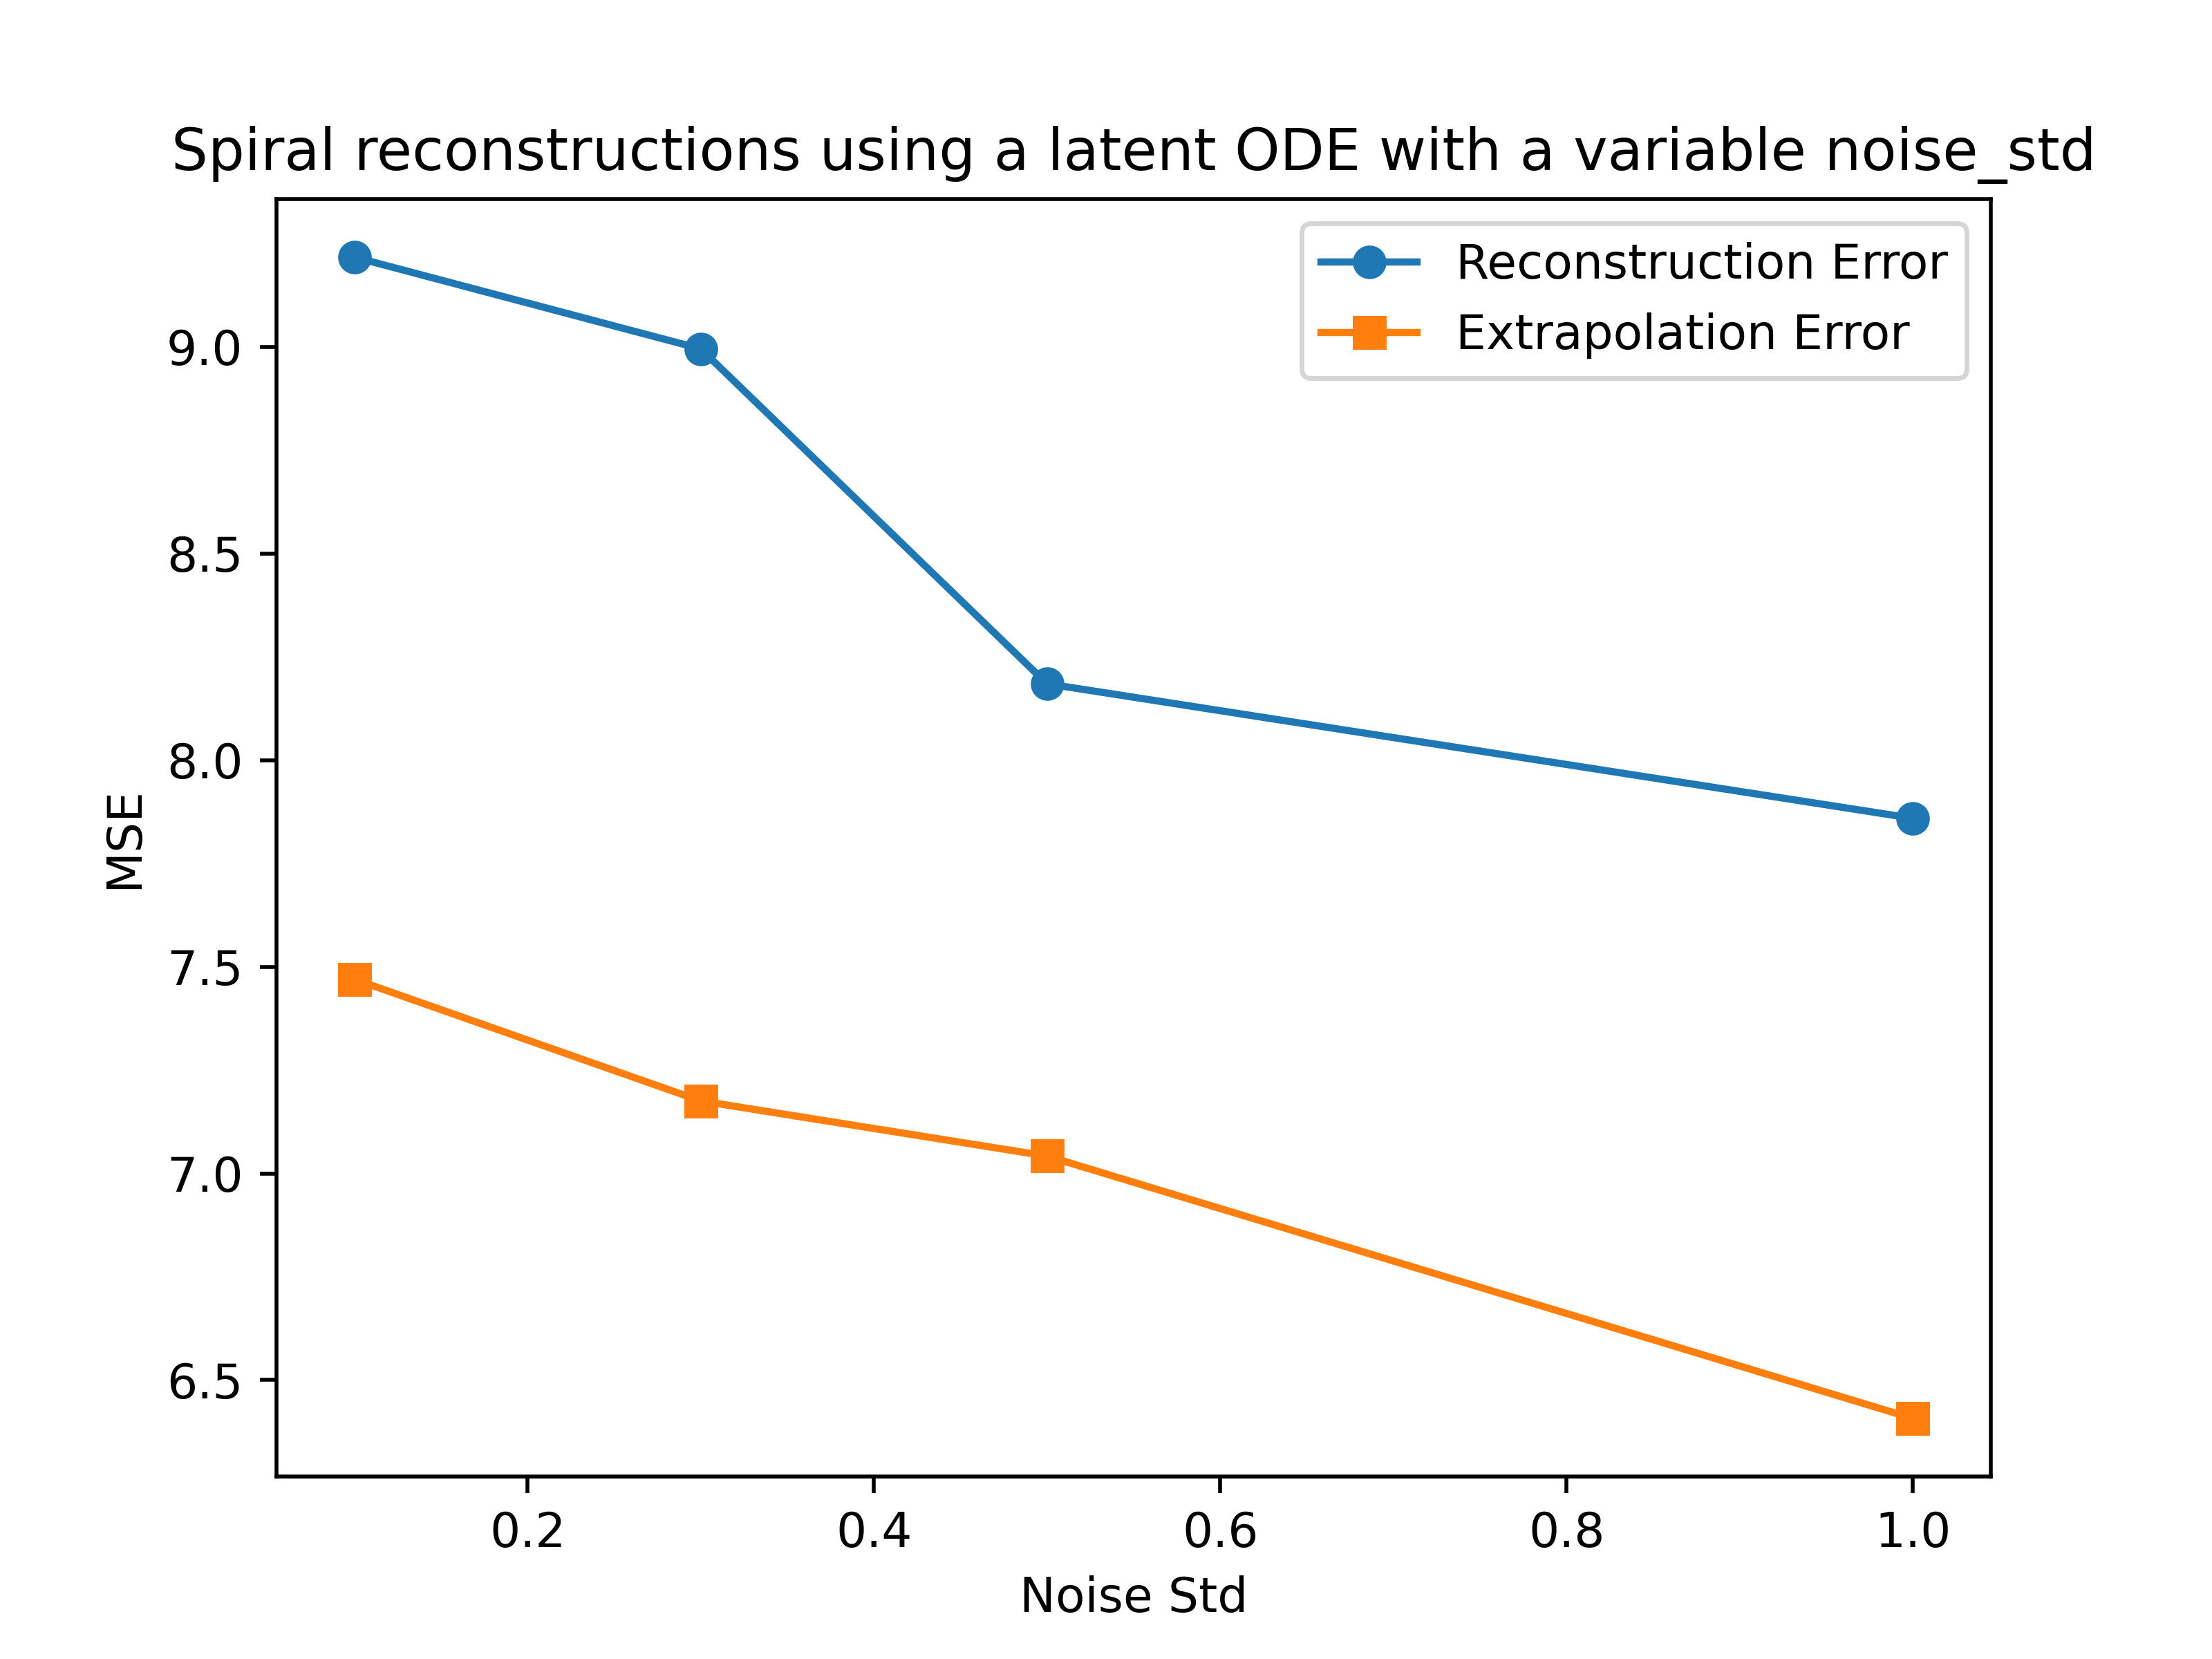

In [18]:
display(Image(filename='/workspace/error_curve.png', width=400, height=400))


The experimental results demonstrate that as noise_std increases, the training converges with lower final loss values and slightly reduced reconstruction and extrapolation errors. 

1. For noise_std = 0.1:
    The training loss starts at an extremely high value (∼94,652 at iteration 100) and decreases rapidly, reaching ∼2.65 by iteration 1000.

    The final reconstruction error is 9.2174, and the extrapolation error is 7.4699.

2. For noise_std = 0.3:
    The training loss begins at a lower value (∼10,579 at iteration 100) and converges to approximately 98.42 by iteration 1000.
    
    The final reconstruction error is slightly lower at 8.9955, and the extrapolation error is 7.1754.
3. For noise_std = 0.5:
    The training loss starts at ∼3,877 and converges to about 181.06 by iteration 1000.
    
    The reconstruction error further decreases to 8.1849, and the extrapolation error is 7.0420.
4. For noise_std = 1.0:
    The training loss starts even lower (∼1,195) and converges to approximately 354.38 by iteration 1000.
    
    The final reconstruction error is 7.8594, and the extrapolation error is 6.4070.

It may initially seem counterintuitive that increasing noise_std from 0.1 to 1.0 results in slightly lower reconstruction and extrapolation errors. However, this trend can be explained by the regularization effect:
A higher noise_std forces the model to focus on capturing the overall trend or underlying dynamics of the spiral rather than overfitting to the fine, noisy details of the data. This regularization effect leads to smoother predictions, which, when compared to the noise-free true trajectory, result in lower mean squared errors.

---
# **Conclusion**

This project successfully replicated the spiral trajectory reconstruction task from the original paper and extended the numerical study to analyze the impact of observation noise on model performance. The results confirm the effectiveness of the Latent ODE framework for modeling irregularly sampled time-series data, demonstrating its ability to reconstruct trajectories with varying levels of observation noise. The experiments reveal that increasing observation noise can, counterintuitively, enhance generalization by preventing overfitting to fine details. However, this effect is constrained by the model’s capacity and the number of training iterations. And I use the development container and Jupyter notebook ensure that the findings are reproducible.